# Histogram Equalization

In [17]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

## Mengambil Gambar dan Meng-convert ke Array 

In [2]:
#mengambil gambar 
img = Image.open("kopiGrayscale.jpg")

# convert ke grayscale
imgray = img.convert(mode='L')

#convert ke NumPy array
img_array = np.asarray(imgray)


## Menghitung histogram yang dinormalisasi dan histogram kumulatif

In [3]:
#meratakan array gambar dan menghitung histogram melalui binning
histogram_array = np.bincount(img_array.flatten(), minlength=256)

#Menormalkan
num_pixels = np.sum(histogram_array)
histogram_array = histogram_array/num_pixels

#cumulative histogram
chistogram_array = np.cumsum(histogram_array)

## Menghitung peta transformasi intensitas piksel

In [4]:
transform_map = np.floor(255 * chistogram_array).astype(np.uint8)

## Pemerataan dengan transformasi piksel

In [5]:
# meratakan array gambar ke dalam daftar 1D
img_list = list(img_array.flatten())

#mengubah nilai piksel untuk menyamakan kedudukan
eq_img_list = [transform_map[p] for p in img_list]

# Membentuk kembali dan menulis kembali ke img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)

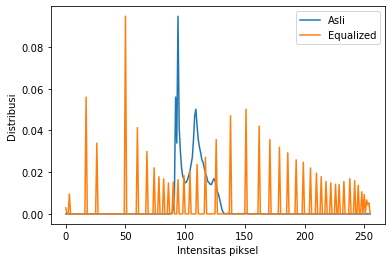

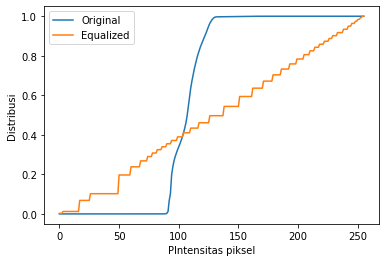

In [22]:
#menghitung histogram dan histogram kumulatif dari gambar yang disamakan
eq_histogram_array = np.bincount(eq_img_array.flatten(), minlength=256)
num_pixels = np.sum(eq_histogram_array)
eq_pdf = eq_histogram_array/num_pixels
eq_cdf = np.cumsum(eq_pdf)

#plot
plt.figure()
plt.plot(ori_pdf)
plt.plot(eq_pdf)
plt.xlabel('Intensitas piksel')
plt.ylabel('Distribusi')
plt.legend(['Asli','Equalized'])
plt.figure()
plt.plot(ori_cdf)
plt.plot(eq_cdf)
plt.xlabel('PIntensitas piksel')
plt.ylabel('Distribusi')
plt.legend(['Original','Equalized'])

## Perbandingan Gambar

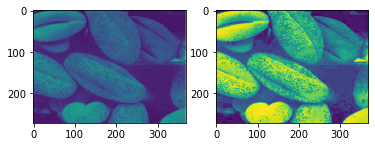

In [15]:
eq_img = Image.fromarray(eq_img_array, mode='L')

plt.subplot(1, 2, 1)
plt.imshow(imgray)

plt.subplot(1, 2, 2)
plt.imshow(eq_img)
plt.show()